In [1]:
#Librerias
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

pd.options.display.max_columns = None

In [2]:
#Base de datos 
data = pd.read_csv("D:/DATASET/youngpeople.csv")
data.shape

(1010, 150)

MUSIC PREFERENCES (19) 0:19

MOVIE PREFERENCES (12) 19:31

HOBBIES & INTERESTS (32) 31:63

PHOBIAS (10) 63:73

HEALTH HABITS (3) 73:76

PERSONALITY TRAITS, VIEWS ON LIFE & OPINIONS (57) 76:133

SPENDING HABITS (7) 133:140

DEMOGRAPHICS (10 ) 140:150

# ANÁLISIS FACTORIAL 

## Diferencias entre PCA y AF 

- PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.

- PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.

- PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.

- PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.

- PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.

- PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique.

In [3]:
#Librerias
from factor_analyzer import FactorAnalyzer

In [4]:
df = data.iloc[:, 76:133]
df.head()

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day
1,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day
2,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day
3,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,1,1.0,2.0,5.0,5.0,5.0,1.0,5.0,4.0,3,3.0,1,i am often early,only to avoid hurting someone,1.0,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day
4,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.0,5.0,3.0,4.0,5.0,3,3.0,3,i am always on time,everytime it suits me,3.0,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day


In [5]:
#Eliminar NAs
df = df.dropna()

#...............................................................................................
#Codificar datos categóricos
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)


In [155]:
df.shape

(864, 57)

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [156]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(8715.179474783516, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [157]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.7693499863396086

The overall KMO for our data is 0.76 is good. This value indicates that you can proceed with your planned factor analysis.

# Elegir el número de factores 

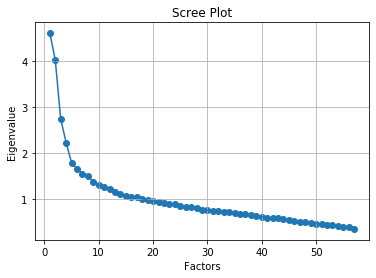

In [6]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Empieza a decear en picado a partir del 5 factor. Un buen punto de corte. 

In [159]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
AF = fa.loadings
AF

,Factor1,Factor2,Factor3,Factor4,Factor5
Daily events,0.058953,0.206877,0.250416,0.028915,0.026094
Prioritising workload,-0.150045,0.555946,-0.012803,0.128156,0.078913
Writing notes,-0.015927,0.420849,-0.006039,0.261380,0.225307
Workaholism,0.029275,0.527082,0.069524,0.032979,0.088573
Thinking ahead,0.127909,0.530457,0.023475,0.055426,0.035213
Final judgement,0.112493,0.119861,0.046188,-0.039756,0.381338
Reliability,-0.102481,0.539373,0.061028,-0.003491,0.073534
Keeping promises,-0.034661,0.420538,0.053358,-0.033511,0.121450
Loss of interest,0.226286,0.003524,0.273777,0.101882,-0.149262
Friends versus money,-0.111839,0.022026,0.021279,-0.045824,0.381357


In [160]:
P = pd.DataFrame(fa.get_factor_variance())
P

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.507756,2.463238,2.766033,1.743861,2.169602
Proportion Var,0.043996,0.043215,0.048527,0.030594,0.038063
Cumulative Var,0.043996,0.087210,0.135737,0.166331,0.204395


In [38]:
#Total de varianza explicada con todos los Factores 
P.iloc[1].sum() # (Cumulative Var = 0,210)

0.21207457871131444

In [161]:
AF.head()

,Factor1,Factor2,Factor3,Factor4,Factor5
Daily events,0.058953,0.206877,0.250416,0.028915,0.026094
Prioritising workload,-0.150045,0.555946,-0.012803,0.128156,0.078913
Writing notes,-0.015927,0.420849,-0.006039,0.261380,0.225307
Workaholism,0.029275,0.527082,0.069524,0.032979,0.088573
Thinking ahead,0.127909,0.530457,0.023475,0.055426,0.035213


FUNCTION

In [162]:
#Obtener los Top variables que mejor explican cada factor 
F = AF.unstack()
F = pd.DataFrame(F).reset_index()
F = F.sort_values(['level_0',0], ascending=False).groupby('level_0').head(5)
F = F.sort_values(by="level_0")
F.columns=["FACTOR","Variable","Varianza_Explica"]
F = F.reset_index().drop(["index"],axis=1)
F

,FACTOR,Variable,Varianza_Explica
0,Factor1,Mood swings,0.353226
1,Factor1,Fake,0.469616
2,Factor1,Changing the past,0.482307
3,Factor1,Loneliness,0.542350
4,Factor1,Self-criticism,0.398420
5,Factor2,Writing notes,0.420849
6,Factor2,Workaholism,0.527082
7,Factor2,Thinking ahead,0.530457
8,Factor2,Reliability,0.539373
9,Factor2,Prioritising workload,0.555946


In [163]:
#Obtener top valores de cada Factor 
F = F.pivot(columns='FACTOR')["Variable"]
F.apply(lambda x: pd.Series(x.dropna().to_numpy()))

FACTOR,Factor1,Factor2,Factor3,Factor4,Factor5
0,Mood swings,Writing notes,New environment,Appearence and gestures,Friends versus money
1,Fake,Workaholism,Knowing the right people,Life struggles,Life struggles
2,Changing the past,Thinking ahead,Energy levels,Mood swings,Finding lost valuables
3,Loneliness,Reliability,Socializing,Health,Children
4,Self-criticism,Prioritising workload,Number of friends,Getting angry,God


- FACTOR1: Neuroticism

- FACTOR2: Conscientiousness

- FACTOR3: Extraversion

- FACTOR4: ¿Agreeableness?

- FACTOR5: Openness (Conservative) 

Factor1, 2 and 3 are very clear

The Factor 4 and 5 not much;
Life struggles would be better in Factor 5. Anyway, mostly they look a lot as big five model.  